In [57]:
print("Hello World")
#TASKS
#implement algorithms
#plotting
#markdown texts and explanation
#errors?
#extras for A

Hello World

<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 21pt; margin-bottom: 0.3em;"><b> Computational Task 1: Root-Finding</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Caparas, Maxine Van</div>

## Newton-Raphson Method

In [ ]:
#Function that computes error and tabulizes x, f(x), approximate error, and true error (if true root is available) per iteration

function tabulize(x_values::Float64[],y_values::Float64[],trueroot=nothing)
    
end

In [26]:
#Newton-Raphson method function
function newtonRaphson(f::Function,fprime::Function,xin,tol,N)
    n=1
    x=0.
    x_values = Float64[xin]
    while n<=N
        x=xin-f(xin)/fprime(xin)
        if f(x)==0 || abs(x-xin)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xin=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with
        function value $y")
    return x_values
end




newtonRaphson (generic function with 1 method)

In [37]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f(x) = x.^5 + 2*x.^3 - 5*x .- 2
fprime(x) = 5x.^4+6x.^2-5
xin = 1
tol = 10^(-4.)
N = 20

#Plotting-related
max_x = 1.7
min_x = 0.9
length_x = 1000
max_y = 14
min_y = -5
opacity_control = 3 #determines how gradually transparent/opaque tangent lines will be

x_values=Float64[]
x_values=newtonRaphson(f,fprime,xin,tol,N)
foreach(x -> println("x = $x"), x_values)

x is 1.3196411672093729 and the iteration number is 6
x = 1.0
x = 1.6666666666666665
x = 1.432104832104832
x = 1.3354960932923996
x = 1.3200078757043952
x = 1.3196413686678512


In [ ]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration


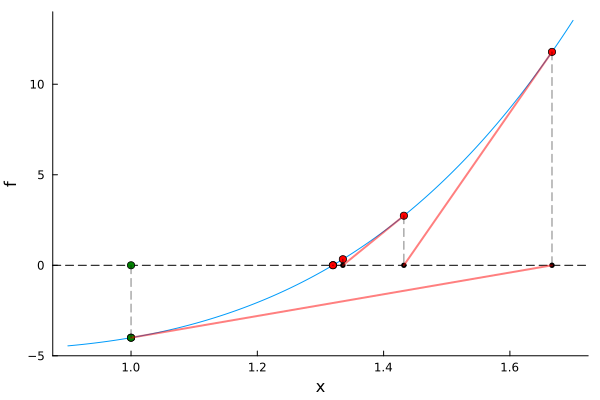

In [55]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size=length(x_values)
y_values=Float64[]
y_zeros = zeros(array_size)

for x in x_values
    push!(y_values, f(x))
end

x = range(min_x, max_x, length=length_x)
y = f.(x)

Plots.plot(x, y, ylims=(min_y, max_y), legend=false, grid=false, xlabel="x", ylabel="f") #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values, y_zeros, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values, y_values, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values[1],x_values[1]], [y_values[1],0], label=false, color=:green, markersize=4) #Marks initial guess x0 as green

# for x_point in x_values #Iterates to draw each tangent line for every x passed by
#     alpha = opacity_control/array_size
#     tangent_line(x) = fprime(x_point) * (x - x_point) + f(x_point)
#     plot!(x, tangent_line, label=false, linestyle=:solid, color=:red, alpha=alpha)
# end

i=2
while i<array_size2
    alpha = opacity_control/array_size
    plot!([x_values[i-1],x_values[i]], [f(x_values[i-1]),0], label=false, linestyle=:solid, color=:red, alpha=alpha,linewidth=2)
    i+=1
end

for x_point in x_values #Iterates to draw each line from (x,f(x)) to (x,0)
    alpha = opacity_control/array_size
    plot!([x_point, x_point], [f(x_point), 0], label=nothing, linestyle=:dash, color=:black, alpha = alpha)
end

current()



Note increasing opacity and increasing slope as it converges

## Secant Method

In [29]:
function secant(f::Function,xzero,xone,tol,N)
    n=1
    x=0.
    x_values = Float64[xzero,xone]
    while n<=N
        x=xone-f(xone)*(xone-xzero)/(f(xone)-f(xzero))
        if f(x)==0 || abs(x-xone)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xzero=xone
        xone=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives xone with
        function value $y")
    return x_values
end


secant (generic function with 1 method)

In [42]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f2(x) = cos(x)-x
xzero = 0.43
xone = 1
tol2 = 10^(-4.)
N2 = 20

#Plotting-related
max_x2 = 1.1
min_x2 = 0.32
length_x2 = 1000
max_y2 = 0.5
min_y2 = -0.5
opacity_control2 = 3 #determines how gradually transparent/opaque secant lines will be

x_values2=Float64[]
x_values2=secant(f2,xzero,xone,tol2,N2)
foreach(x -> println("x = $x"), x_values2)

x is 0.7390851324504771 and the iteration number is 4
x = 0.43
x = 1.0
x = 0.7208502287118924
x = 0.7381625717065861
x = 0.7390888852543998


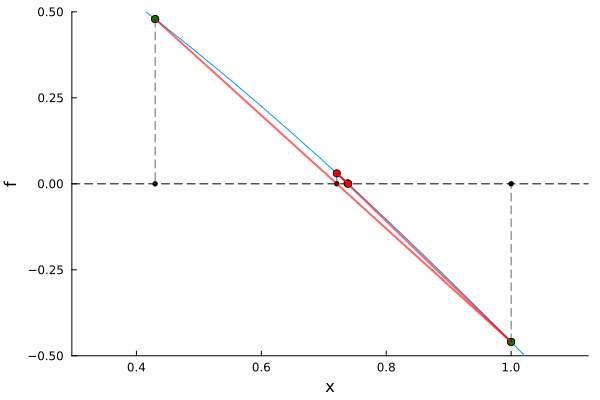

In [56]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size2=length(x_values2)
y_values2=Float64[]
y_zeros2 = zeros(array_size2)

for x in x_values2
    push!(y_values2, f2(x))
end

x2 = range(min_x2, max_x2, length=length_x2)
y2 = f2.(x2)

Plots.plot(x2, y2, ylims=(min_y2, max_y2), legend=false, grid=false, xlabel="x", ylabel="f") #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values2, y_zeros2, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values2, y_values2, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values2[1],x_values2[2]], [y_values2[1],y_values2[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

i=2
while i<array_size2
    alpha = opacity_control2/array_size2
    # secant_line(x) = ((f2(x_values2[i])-f2(x_values2[i-1]))/(x_values2[i]-x_values2[i-1])) * (x - x_values2[i-1]) + f2(x_values2[i-1])
    # plot!(x2, secant_line, label=false, linestyle=:dash, color=:red, alpha=alpha)
    plot!([x_values2[i],x_values2[i-1]], [f2(x_values2[i]),f2(x_values2[i-1])], label=false, linestyle=:solid, color=:red, alpha=alpha, linewidth=2)
    i+=1
end

for x_point in x_values2 #Iterates to draw each line from (x,f(x)) to (x,0)
    alpha = opacity_control2/array_size2
    plot!([x_point, x_point], [f2(x_point), 0], label=nothing, linestyle=:dash, color=:black, alpha = alpha)
end

current()